In [1]:
%pip install seaborn
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: xgboost in c:\users\outis lupin\appdata\local\programs\python\python312\lib\site-packages (2.1.0)




[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

color_pal = sns.color_palette()

## Types of time series data

![alt text](1_V_RKPeIxCB9CS_2SsLyKXw.jpg)

## Data Preparation

In [61]:
df = pd.read_csv('D:\Dasun\Time Series Forecasting with XGBoost\Datasets\PJME_hourly.csv')
df = df.set_index('Datetime') #setting the number index into the mentioned column name
#df.index # this will show the index type
df.index = pd.to_datetime(df.index)#since ht datetime column type is object, need to convert it into datetime type

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Outis Lupin\AppData\Local\Temp\ipykernel_8748\3978864871.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('D:\Dasun\Time Series Forecasting with XGBoost\Datasets\PJME_hourly.csv')


In [62]:
df.head()
#df.tail()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


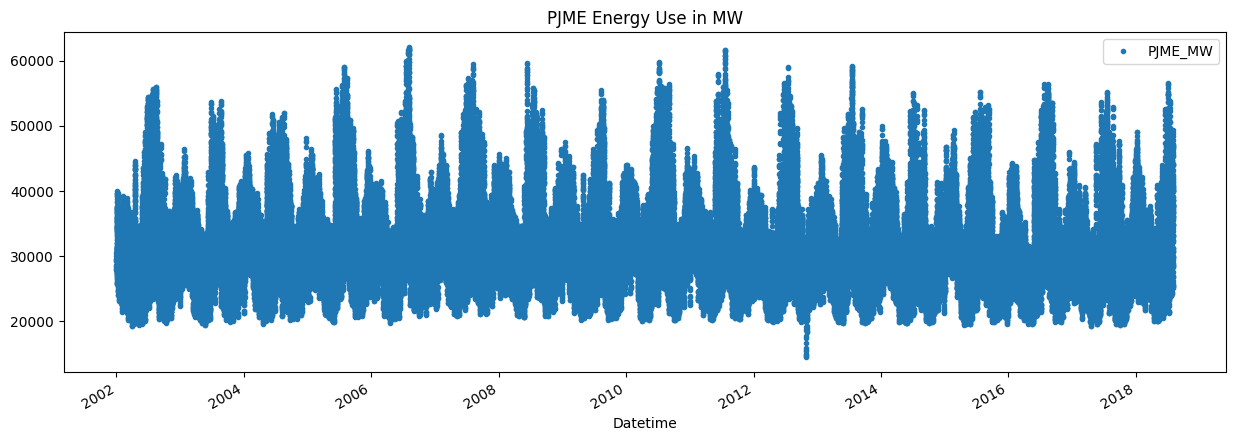

In [63]:
df.plot(style='.', 
        figsize=(15, 5), 
        color=color_pal[0], 
        title='PJME Energy Use in MW')
plt.show()

## Train / Test Split

C:\Users\Outis Lupin\AppData\Local\Temp\ipykernel_8748\3773795364.py:8: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  ax.legend('Train set', 'Test set')


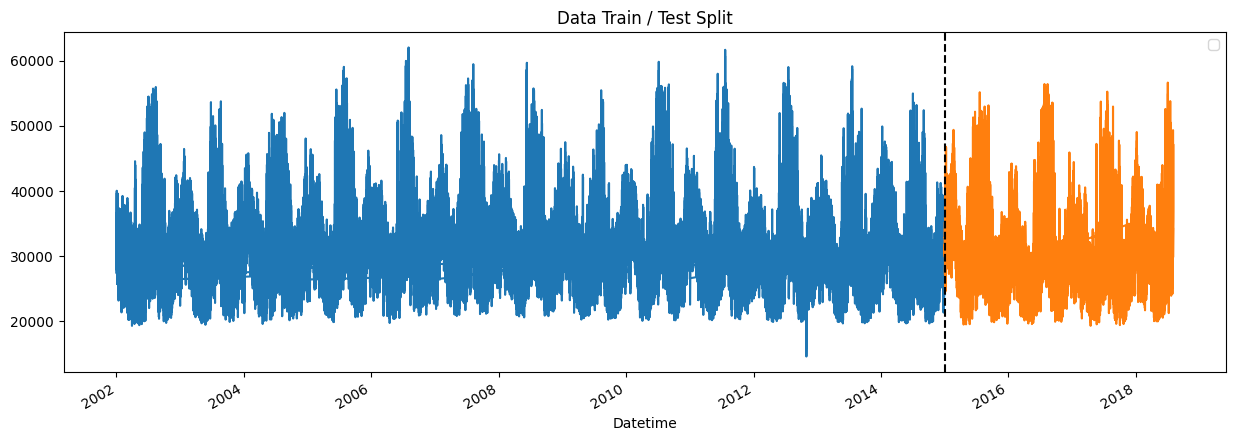

In [64]:
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']

fig, ax = plt.subplots(figsize = (15, 5))
train.plot(ax=ax, label = 'Training set', title = 'Data Train / Test Split')
test.plot(ax=ax, label = 'Testing set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend('Train set', 'Test set')
plt.show()

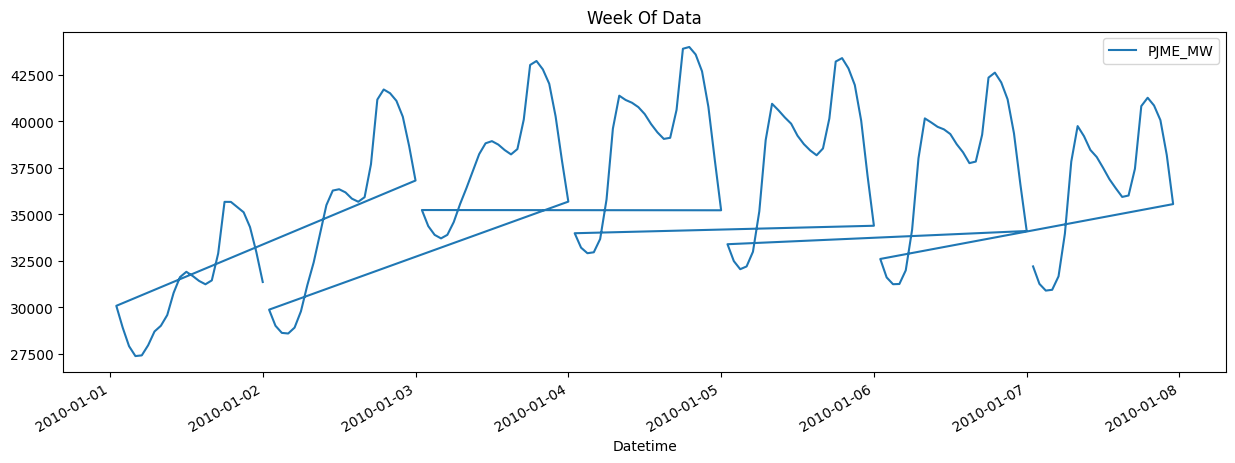

In [65]:
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

## Feature Creation

In [68]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)
#print(df.head())

                     PJME_MW  hour  dayofweek  quarter  month  year  \
Datetime                                                              
2002-12-31 01:00:00  26498.0     1          1        4     12  2002   
2002-12-31 02:00:00  25147.0     2          1        4     12  2002   
2002-12-31 03:00:00  24574.0     3          1        4     12  2002   
2002-12-31 04:00:00  24393.0     4          1        4     12  2002   
2002-12-31 05:00:00  24860.0     5          1        4     12  2002   

                     dayofyear  dayofmonth  weekofyear  
Datetime                                                
2002-12-31 01:00:00        365          31           1  
2002-12-31 02:00:00        365          31           1  
2002-12-31 03:00:00        365          31           1  
2002-12-31 04:00:00        365          31           1  
2002-12-31 05:00:00        365          31           1  


## Visualize Features / Target Relationship

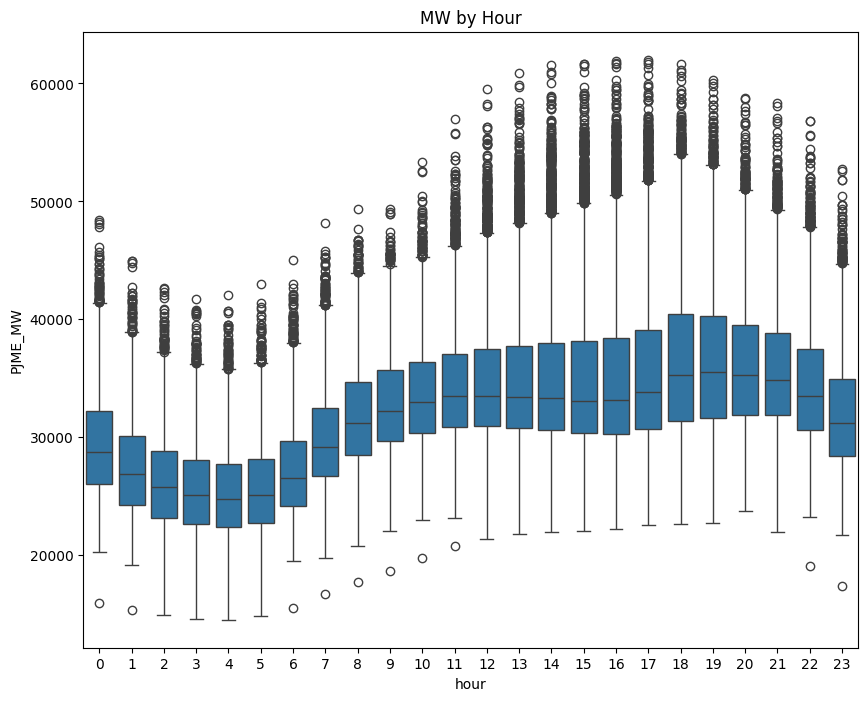

In [69]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='PJME_MW')
ax.set_title('MW by Hour')
plt.show()

C:\Users\Outis Lupin\AppData\Local\Temp\ipykernel_8748\1289198948.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='month', y='PJME_MW', palette='Reds')


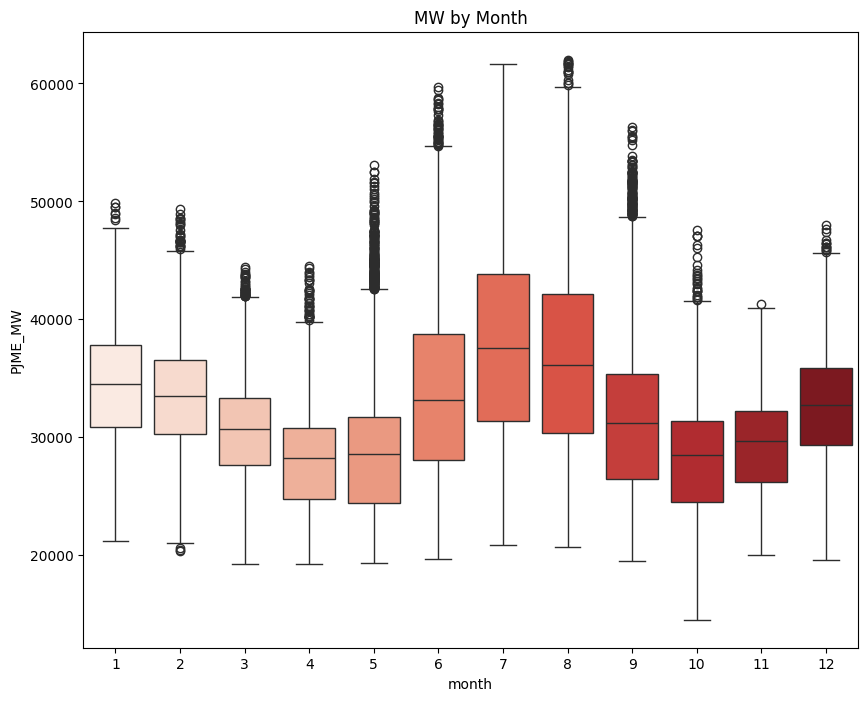

In [71]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='PJME_MW', palette='Reds')
ax.set_title('MW by Month')
plt.show()